In [1]:
from floridaman import data_cleaning
import pandas as pd
import numpy as np

In [2]:
raw_data = data_cleaning.load('null_transformed')

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns

0.6273541972974865


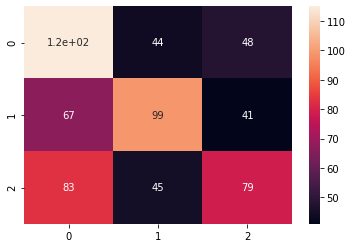

In [39]:
this_data = data_cleaning.generate_candidate_dataset(raw_data, .43, .43, 9)
this_data = data_cleaning.balance(this_data)

X = np.array(this_data[data_cleaning.features(this_data)])
y = np.array(this_data['FAILURETYPE'])

knn = KNeighborsClassifier(n_neighbors=5)
this_score = cross_val_score(knn, X, y, cv=9, scoring='roc_auc_ovo')
y_pred = cross_val_predict(knn, X, y, cv=8)

conf_mat = confusion_matrix(y, y_pred)
sns.heatmap(conf_mat, annot=True)
print(this_score.mean())